NEURAL NETWORK 

> three layes 
* input
* hidden layer
* output layer

Activation function - 

## Kaggle start

WE WILL GET THE DATA SET FROM KAGGLE


!pip install opendatasets --upgrade --quiet

import opendatasets as od

dataset_url = 'Enter Kaggle Dataset URL'

Upload Kaggle.json file to Colab… (Caution: Do not Share kaggle.json as contains API key of your Kaggle Account)

od.download(dataset_url)

In [3]:
!pip install opendatasets --upgrade --quiet

In [4]:
import opendatasets as od

In [5]:
dataset_url = 'https://www.kaggle.com/competitions/digit-recognizer/data'

In [7]:
od.download(dataset_url)

100%|██████████| 15.3M/15.3M [00:00<00:00, 226MB/s]


Extracting archive ./digit-recognizer/digit-recognizer.zip to ./digit-recognizer


## BEGINING
###IMPORT STUFF

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [9]:
data = pd.read_csv('/content/digit-recognizer/train.csv')

In [10]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


we want to work with numpy array  so 

In [11]:
data = np.array(data)

So now we need to split the data  to avoid overfitting

In [27]:
 m, n = data.shape

 # shuffle the data before spliting
np.random.shuffle(data)

# actual split
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

# training data
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_, m_train = X_train.shape


In [32]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [37]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2



In [39]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  470
[7 5 4 ... 9 5 6] [7 5 4 ... 9 5 6]
0.8430731707317073
Iteration:  480
[7 5 4 ... 9 5 6] [7 5 4 ... 9 5 6]
0.8447560975609756
Iteration:  490
[7 5 4 ... 9 5 6] [7 5 4 ... 9 5 6]
0.846390243902439


In [42]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [6]
Label:  6


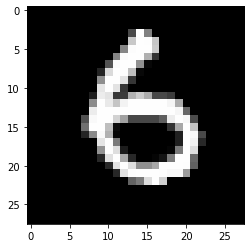

In [44]:
test_prediction(3, W1, b1, W2, b2)

In [45]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[1 5 6 5 1 9 5 8 1 8 8 2 3 2 2 7 5 9 6 9 1 4 7 0 2 7 6 2 6 8 4 4 6 2 9 9 6
 7 0 4 4 0 2 4 6 2 3 2 6 3 4 4 1 8 9 8 1 8 1 7 6 5 3 6 7 7 1 7 1 1 5 6 8 6
 3 4 2 3 4 1 7 5 5 6 1 1 3 7 6 7 2 5 7 9 3 4 8 2 2 0 4 4 9 0 6 4 3 7 6 9 2
 3 7 3 3 1 4 4 8 5 7 1 4 3 0 1 7 7 8 2 2 2 8 0 2 4 5 2 3 9 9 4 1 1 3 5 7 8
 3 9 7 9 4 3 6 8 7 0 1 9 5 5 9 4 6 3 9 3 6 3 3 1 7 3 3 4 1 5 0 1 2 3 4 8 4
 3 2 1 1 8 0 8 0 7 8 5 0 3 0 1 1 9 5 0 0 6 7 7 3 8 1 9 5 1 4 2 2 4 0 8 3 6
 1 5 4 2 7 6 8 3 4 0 1 4 0 1 3 9 8 4 6 1 6 9 0 8 0 8 0 8 8 9 9 1 5 7 0 7 4
 0 9 8 2 5 6 2 7 1 4 1 0 4 6 7 4 3 0 9 4 1 5 5 3 3 2 9 0 7 4 0 6 0 7 5 2 2
 7 8 1 3 8 2 6 8 5 6 0 5 3 4 8 6 4 3 7 4 7 2 6 0 2 8 6 9 9 2 4 1 3 7 9 4 1
 4 9 1 9 0 0 1 7 5 1 6 0 8 7 0 6 8 2 8 0 8 9 6 1 1 3 9 2 7 3 3 1 7 2 0 4 4
 2 2 0 5 4 6 6 9 2 2 2 0 6 9 7 4 9 3 1 9 4 6 0 1 1 6 9 5 2 8 6 2 7 9 3 1 1
 2 9 4 4 9 3 5 8 9 4 2 9 1 2 9 3 7 6 6 3 6 9 6 7 9 2 2 9 9 3 3 0 6 9 2 6 3
 2 4 3 7 0 7 9 2 2 2 1 6 1 8 0 5 6 1 2 9 6 5 1 4 7 3 2 6 7 6 9 1 1 8 0 5 8
 7 6 2 4 0 0 2 3 5 2 5 0 

0.856